## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

In [3]:
p_df = (
    df
    .dropna()
    .copy()
)

## Reglas empiricas

- 1 desviación estandar -> 65% de los datos
- 2 desviación estandar -> 95%
- 3 desviación estandar -> 99.9%

## Medidas

1. Rango
2. Rango intercuartil
3. Desviación estandar
4. Curtosis

## Calcular medidas

### Valor maximo

In [5]:
p_df.select_dtypes(include=np.number).max()

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

### Valor minimo

In [6]:
p_df.select_dtypes(include=np.number).min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

### Rango

In [7]:
p_df.select_dtypes(include=np.number).max() - p_df.select_dtypes(include=np.number).min()

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

### Desviación estandar

In [8]:
p_df.select_dtypes(include=np.number).std()

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

### Rango intercuartil

In [10]:
p_df.select_dtypes(include=np.number).quantile(0.75) -  p_df.select_dtypes(include=np.number).quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [11]:
p_df.select_dtypes(include=np.number).quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [12]:
p_df.select_dtypes(include=np.number).quantile(0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [18]:
(
    df
    .select_dtypes(include=np.number)
    .quantile(
        q=[0.75, 0.5, 0.25]
    )
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(iqr= lambda df: df[0.75] - df[0.25])
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.5,44.45,39.225,9.275
1,bill_depth_mm,18.7,17.30,15.600,3.100
2,flipper_length_mm,213.0,197.00,190.000,23.000
3,body_mass_g,4750.0,4050.00,3550.000,1200.000


## Vusualizar distribuciones

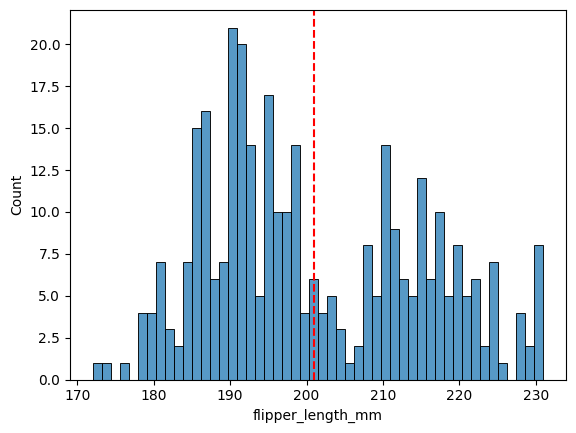

In [30]:
sns.histplot(
    data=p_df,
    x='flipper_length_mm',
    bins=50
)
plt.axvline(
    x=p_df.flipper_length_mm.mean(),
    linestyle='--',
    color='r'
)

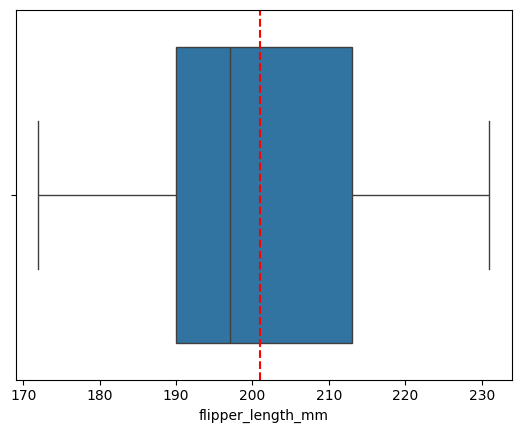

In [28]:
sns.boxplot(
    data=p_df,
    x='flipper_length_mm'
)
plt.axvline(
    x=p_df.flipper_length_mm.mean(),
    linestyle='--',
    color='r'
)